# network-save
- added .net/pajek file conversion
- saves plots

In [1]:
import pkg_resources
pkg_resources.require("networkx==1.8")

import pandas as pd
import numpy as np
import networkx as nx
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages

from glob import glob
fileName = 'article1'

In [2]:
def getFiles(fileName):
    matches = glob('*'+fileName+'*')
    bigFile = matches[0]
    data = pd.DataFrame.from_csv(bigFile)
    return clearSource(data)
    

def clearSource(data):
    columns = ['source','target']
    pre = len(data)
    for column in columns:
        data = data[pd.notnull(data[column])]
    post = len(data)
    print "Filtered %s rows to %s rows by removing rows with blank values in columns %s" % (pre,post,columns)
    return data
    
    
#data = getFiles(fileName)

In [3]:
def getStuff(data,labels):
    forEdges = labels == ['edge']
    columns = list(data.columns.values)
    items = dict()
    
    nameFunc = {True: lambda x,y: '%s - %s - %s' % (x['source'],x['edge'],x['target']),
                False: lambda x,y: x[y]}[forEdges]
    
    extra = ['source','target'] * forEdges
    
    for label in labels:
        relevant = [col for col in columns if label+'-' in col] + extra
        #relevant = extra
        print "Extracting %s data from %s" % (label,relevant)
        for i in data.index:
            row = data.ix[i]
            for col in relevant:
                if str(row[col]).lower() != 'nan':
                    name = nameFunc(row,label)
                    if name not in items:
                        items[name] = dict()
                    items[name][col.replace(label+'-','')] = row[col]
    return items
    

def getNodes(data):
    return getStuff(data,['source','target'])


def getEdges(data):
    return getStuff(data,['edge'])
      
    
#allNodes = getNodes(data); allEdges = getEdges(data)

In [4]:
def addNodes(graph,nodes):
    for key,value in nodes.iteritems():
        graph.add_node(key,attr_dict=value)
    return graph
    
def addEdges(graph,edges):
    for key,value in edges.iteritems():
        value['label'] = key
        value['edge'] = key.split(' - ')[1]
        graph.add_edge(value['source'],value['target'],attr_dict = value)
    return graph
    
def createNetwork(edges,nodes):
    graph = nx.MultiGraph()
    graph = addNodes(graph,nodes)
    graph = addEdges(graph,edges)
    return graph


#fullGraph = createNetwork(allEdges,allNodes)

In [5]:
def drawIt(graph,what='graph', save_plot=None):
    style=nx.spring_layout(graph)
    size = graph.number_of_nodes()
    print "Drawing %s of size %s:" % (what,size)
    if size > 20:
        plt.figure(figsize=(10,10))
        if size > 40:
            nx.draw(graph,style,node_size=60,font_size=8)
            if save_plot is not None:
                print('saving: {}'.format(save_plot))
                plt.savefig(save_plot)
        else:
            nx.draw(graph,style)
            if save_plot is not None:
                print('saving: {}'.format(save_plot))
                plt.savefig(save_plot)
    else:
        nx.draw(graph,style)
        if save_plot is not None:
            print('saving: {}'.format(save_plot))
            plt.savefig(save_plot)
    plt.show()
    
    
def describeGraph(graph, save_plot=None):
    components = nx.connected_components(graph)
    isolated = [entry[0] for entry in components if len(entry)==1]
    params = (graph.number_of_edges(),graph.number_of_nodes(),len(components),len(isolated))
    print "Graph has %s nodes, %s edges, %s connected components, and %s isolated nodes\n" % params
    drawIt(graph, save_plot=save_plot)
    for idx, sub in enumerate(components):
        drawIt(graph.subgraph(sub),what='component', save_plot='{}-{}.png'.format('component', idx))
    print "Isolated nodes:", isolated

def getGraph(fileRef, save_plot=None):
    data = getFiles(fileName)
    nodes = getNodes(data)
    edges = getEdges(data)
    graph = createNetwork(edges,nodes)
    fileOut = fileRef.split('.')[0]+'.gml'
    print "Writing GML file to %s" % fileOut
    nx.write_gml(graph, fileOut)
    
    fileOutNet = fileRef.split('.')[0]+'.net'
    print "Writing net file to %s" % fileOutNet
    nx.write_pajek(graph, fileOutNet)
    
    describeGraph(graph, save_plot)
    return graph, nodes, edges

Filtered 147 rows to 147 rows by removing rows with blank values in columns ['source', 'target']
Extracting source data from []
Extracting target data from []
Extracting edge data from ['edge-comments', 'source', 'target']
Writing GML file to article1.gml
Writing net file to article1.net
Graph has 147 nodes, 140 edges, 17 connected components, and 0 isolated nodes

Drawing graph of size 140:
saving: graph.png


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


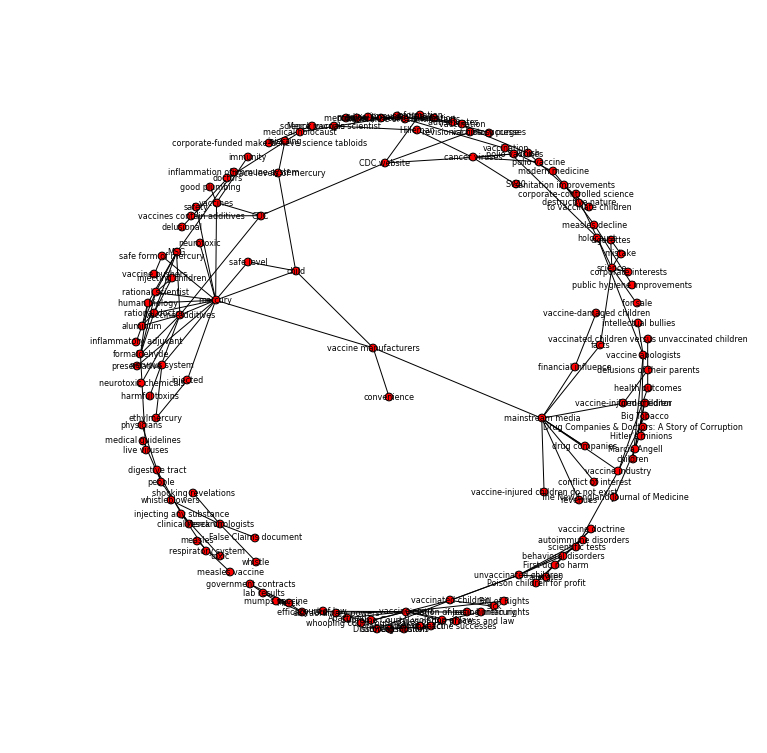

Drawing component of size 71:
saving: component-0.png


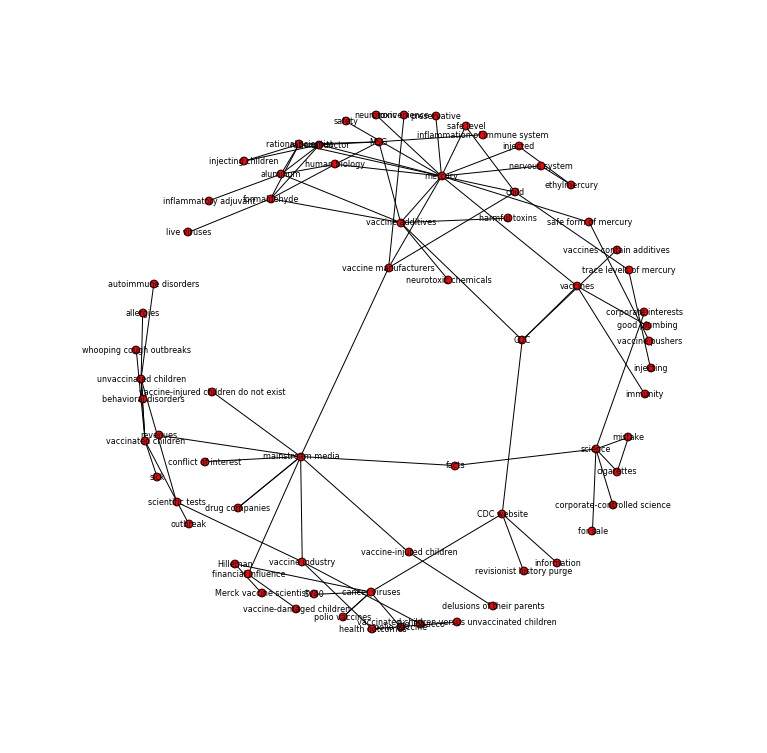

Drawing component of size 13:
saving: component-1.png


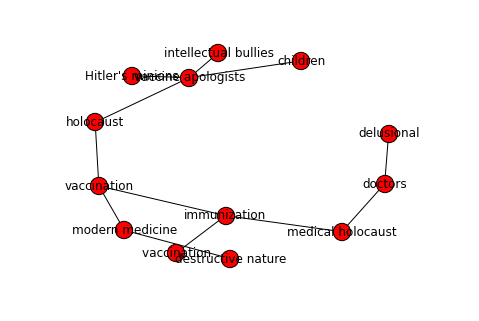

Drawing component of size 10:
saving: component-2.png


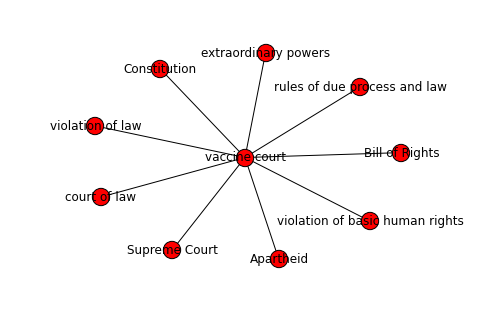

Drawing component of size 5:
saving: component-3.png


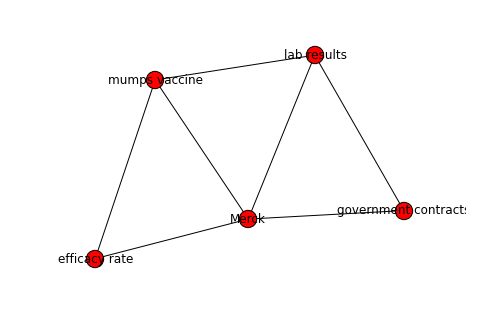

Drawing component of size 5:
saving: component-4.png


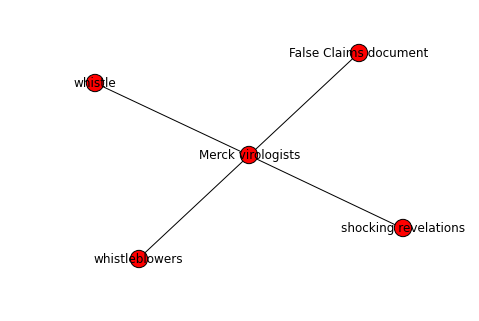

Drawing component of size 4:
saving: component-5.png


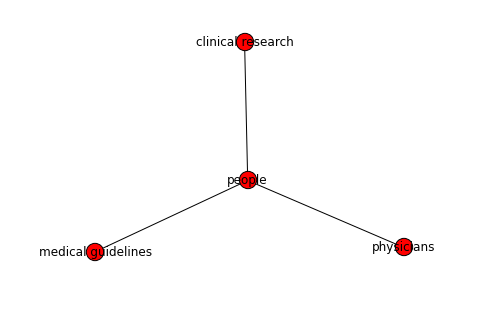

Drawing component of size 4:
saving: component-6.png


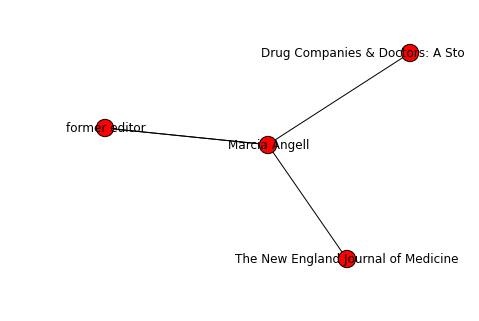

Drawing component of size 4:
saving: component-7.png


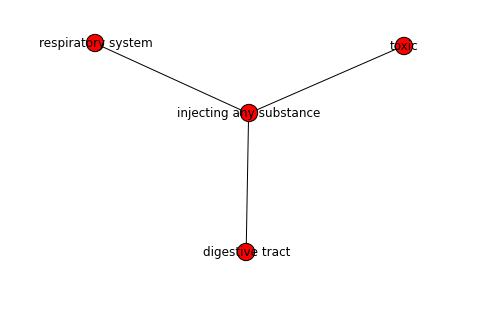

Drawing component of size 4:
saving: component-8.png


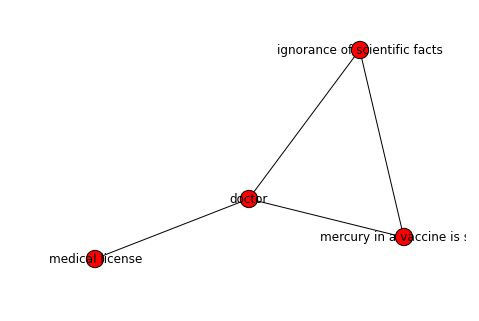

Drawing component of size 3:
saving: component-9.png


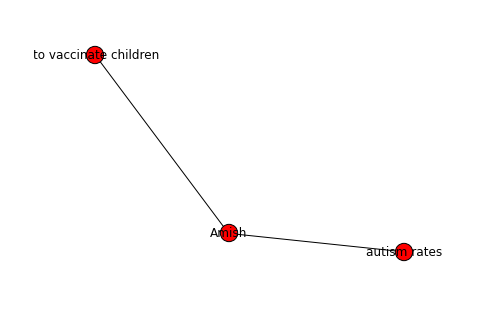

Drawing component of size 3:
saving: component-10.png


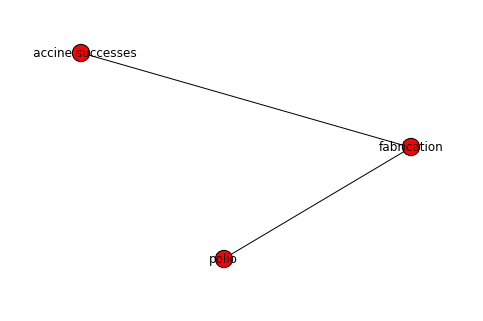

Drawing component of size 3:
saving: component-11.png


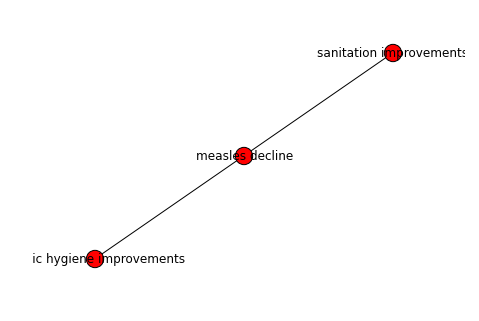

Drawing component of size 3:
saving: component-12.png


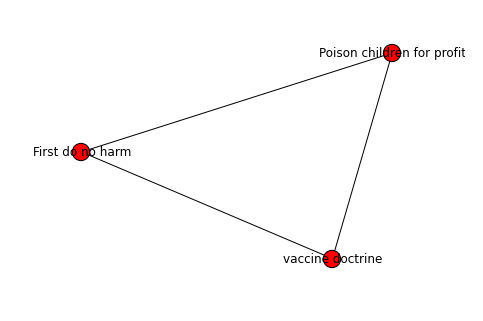

Drawing component of size 2:
saving: component-13.png


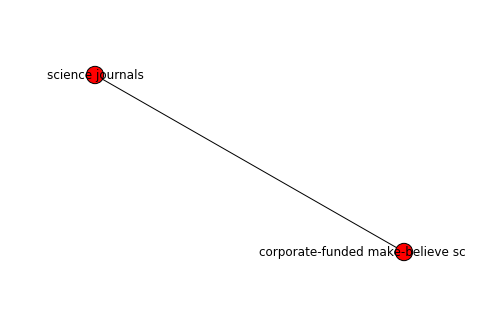

Drawing component of size 2:
saving: component-14.png


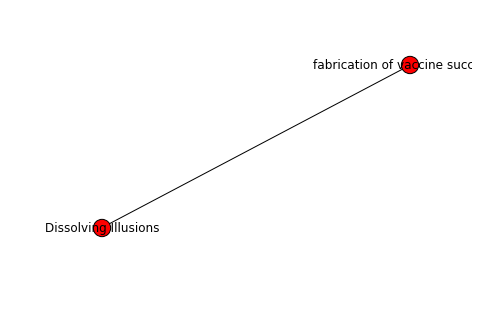

Drawing component of size 2:
saving: component-15.png


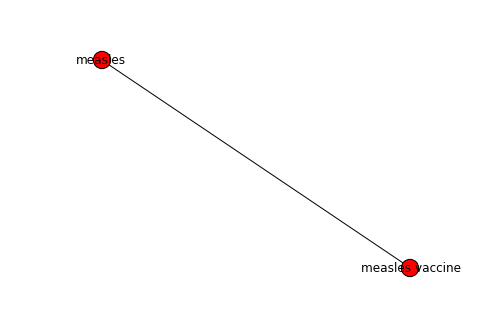

Drawing component of size 2:
saving: component-16.png


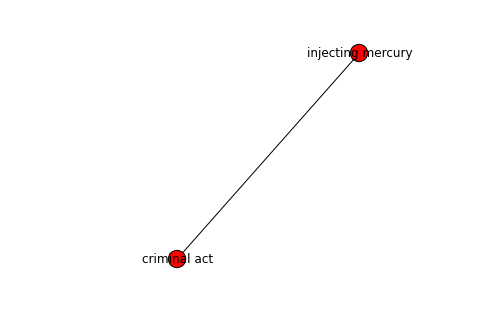

Isolated nodes: []


In [6]:
fileName = 'article1'
graph, nodes, edges = getGraph(fileName, save_plot='graph.png')

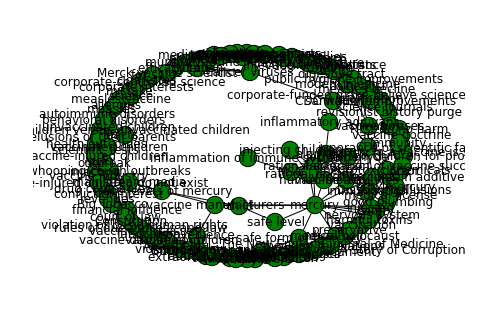

In [12]:
nx.draw_spring(graph, node_color='g')

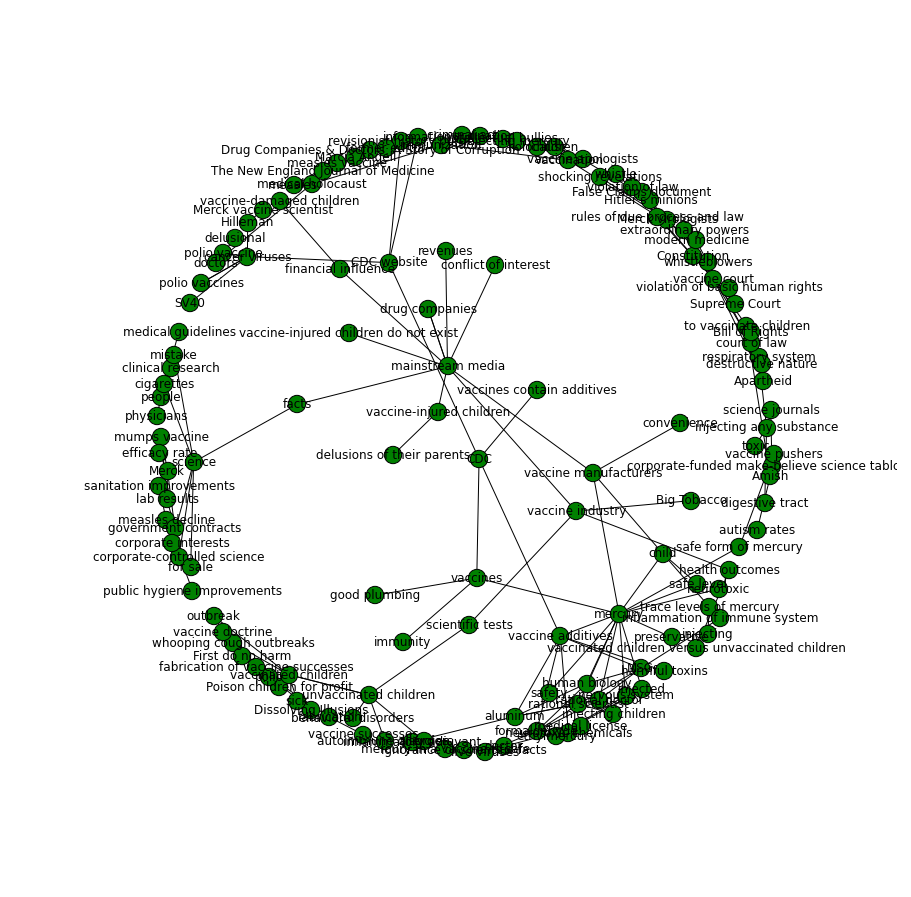

In [13]:
plt.figure(figsize=(12, 12))
nx.draw_spring(graph, node_color='g')
plt.show()

In [16]:
# return a dictionary of centrality values for each node
nx.degree_centrality(graph)

{'Amish': 0.014388489208633094,
 'Apartheid': 0.007194244604316547,
 'Big Tobacco': 0.007194244604316547,
 'Bill of Rights': 0.007194244604316547,
 'CDC': 0.02877697841726619,
 'CDC website': 0.02877697841726619,
 'Constitution': 0.007194244604316547,
 'Dissolving Illusions': 0.007194244604316547,
 'Drug Companies & Doctors: A Story of Corruption': 0.007194244604316547,
 'False Claims document': 0.007194244604316547,
 'First do no harm': 0.014388489208633094,
 'Hilleman': 0.014388489208633094,
 "Hitler's minions": 0.007194244604316547,
 'MSG': 0.03597122302158273,
 'Marcia Angell': 0.02877697841726619,
 'Merck': 0.02877697841726619,
 'Merck vaccine scientist': 0.007194244604316547,
 'Merck virologists': 0.02877697841726619,
 'Poison children for profit': 0.014388489208633094,
 'SV40': 0.007194244604316547,
 'Supreme Court': 0.007194244604316547,
 'The New England Journal of Medicine': 0.007194244604316547,
 'allergies': 0.007194244604316547,
 'aluminum': 0.03597122302158273,
 'autism r

In [17]:
# the type of degree centrality is a dictionary
type(nx.degree_centrality(graph))

dict

In [19]:
# get all the values of the dictionary, this returns a list of centrality scores
# turn the list into a numpy array
# take the mean of the numpy array
np.array(nx.degree_centrality(graph).values()).mean()

0.015107913669064749